# logistic function
The logistic function is defined as follows:
$$
\begin{align*}
f(x) & = \frac{L}{1 + e^{-k (x - x_o)}}  \qquad x \in R \\
\\
\text{where, } & \text{$L$ is the curve's maximum value} \\
& \text{$k$ is the logistic growth-rate; it defines the steepness of the curve} \\
& \text{$x_o$ is the value of the curve's mid-point} \\
\end{align*}
$$

In this notebook we analyze how the logistic function varies with its parameters.
 - [Varying $L$](#varying-l)
 - [Varying $k$](#varying-k)
 - [Varying $x_o$](#varying-xo)
 - [Sigmoid Function](#sigmoid-function)

In [39]:
import numpy as np
from matplotlib import pyplot as plt

x = np.linspace(start=-200, stop=200, num=1000).reshape((1, 1000))

def logistic_func(L, k, x0, x):
    return L / (1 + np.exp(-1 * k * (x - x0)))

# # varying $L$

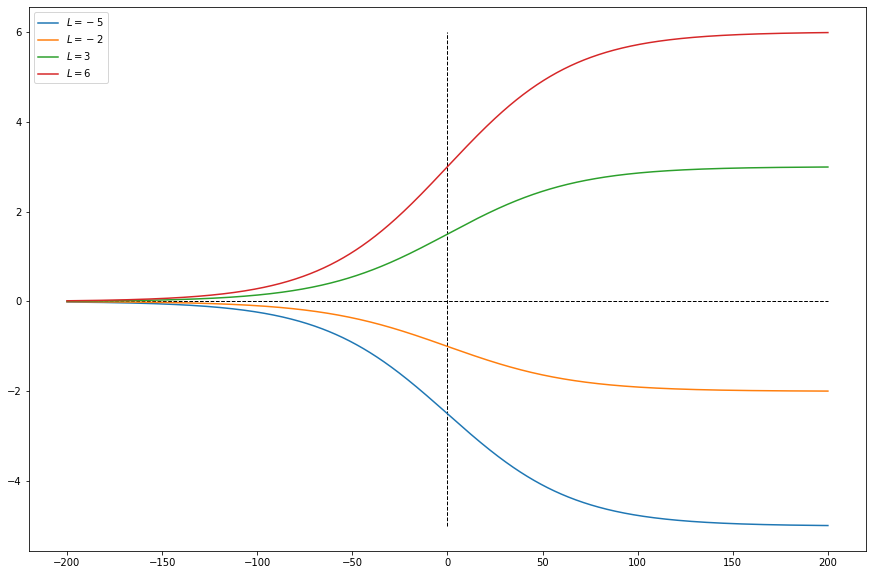

In [40]:
L = np.array([-5, -2, 3, 6]).reshape((4, 1))
k = 0.03
x0 = 0
y = logistic_func(L, k, x0, x)

fig, ax = plt.subplots(1,1, figsize=(15, 10))
lns = ax.plot(x.squeeze(), y.T)
ax.hlines(0, x[0, 0], x[0, -1], colors='k', linestyles='dashed', linewidths=1)
ax.vlines(0, L[0, 0], L[-1, 0], colors='k', linestyles='dashed', linewidths=1)
for idx, l in enumerate(lns):
    l.set_label(f'$L = {L[idx, 0]}$')

plt.legend()
plt.show()

# # varying $k$

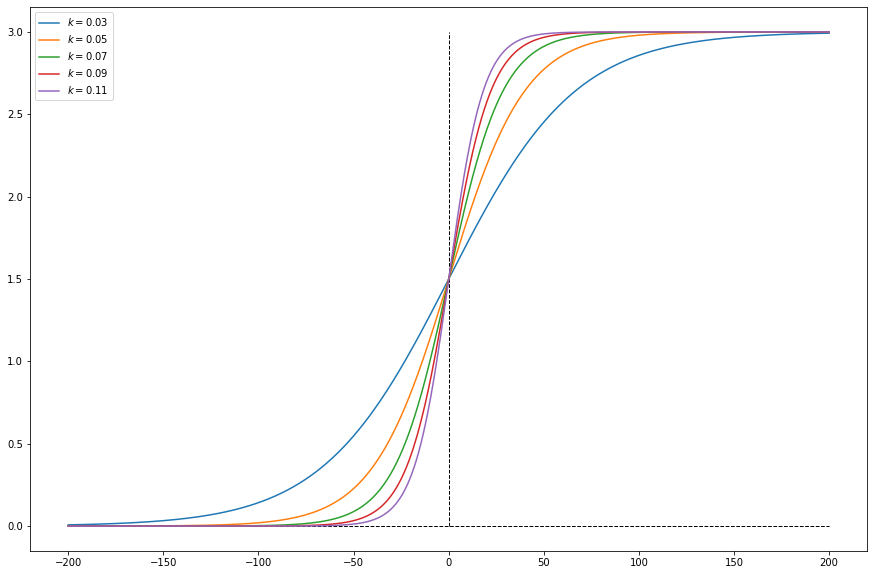

In [41]:
L = 3
k = np.array([0.03, 0.05, 0.07, 0.09, 0.11]).reshape((5, 1))
x0 = 0
y = logistic_func(L, k, x0, x)

fig, ax = plt.subplots(1,1, figsize=(15, 10))
lns = ax.plot(x.squeeze(), y.T)
ax.hlines(0, x[0, 0], x[0, -1], colors='k', linestyles='dashed', linewidths=1)
ax.vlines(0, 0, L, colors='k', linestyles='dashed', linewidths=1)
for idx, l in enumerate(lns):
    l.set_label(f'$k = {k[idx, 0]}$')

plt.legend()
plt.show()

# # varying $x_o$

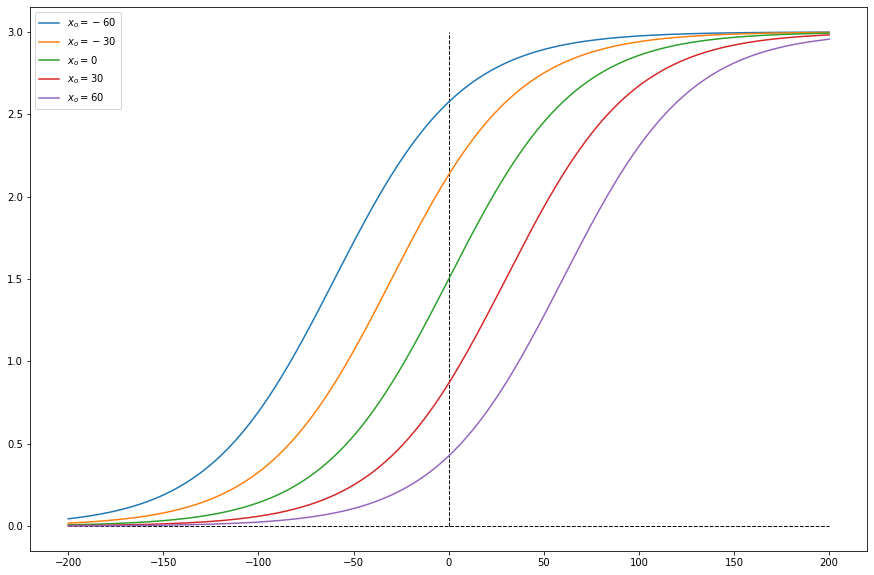

In [44]:
L = 3
k = 0.03
x0 = np.arange(start=-60, stop=61, step=30).reshape((-1, 1))
y = logistic_func(L, k, x0, x)

fig, ax = plt.subplots(1,1, figsize=(15, 10))
lns = ax.plot(x.squeeze(), y.T)
ax.hlines(0, x[0, 0], x[0, -1], colors='k', linestyles='dashed', linewidths=1)
ax.vlines(0, 0, L, colors='k', linestyles='dashed', linewidths=1)
for idx, l in enumerate(lns):
    l.set_label(f'$x_o = {x0[idx, 0]}$')

plt.legend()
plt.show()

# # sigmoid function
It is a special-case of the logistic function, obtained by setting $L = 1$, $k = 1$, and $x_o = 0$:
$$
f(x) = \frac{1}{1 + e^{-x}} \qquad x \in R
$$

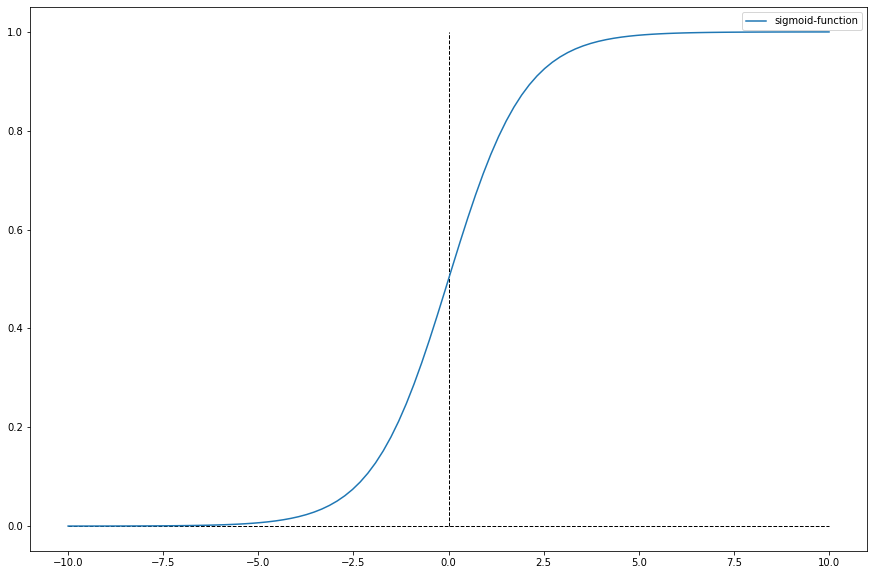

In [49]:
L = 1
k = 1
x0 = 0
x = np.linspace(start=-10, stop=10, num=100).reshape((1, 100))
y = logistic_func(L, k, x0, x)

fig, ax = plt.subplots(1,1, figsize=(15, 10))
lns = ax.plot(x.squeeze(), y.T)
ax.hlines(0, x[0, 0], x[0, -1], colors='k', linestyles='dashed', linewidths=1)
ax.vlines(0, 0, L, colors='k', linestyles='dashed', linewidths=1)
lns[0].set_label("sigmoid-function")

plt.legend()
plt.show()

## # derivatives

### # scalar-derivative
Let $x = \frac{L}{1 + e^{-k (z - z_o)}}$, then we have

$$
\frac{\partial x}{\partial z} = \frac{kLe^{-k (z - z_o)}}{(1 + e^{-k (z - z_o)})^2}
$$

So, when $L = k = 1$ and $z_o = 0$, we have

$$
\begin{align*}
\frac{\partial x}{\partial z} & = \frac{e^{-z}}{(1 + e^{-z})^2} \\
& = \frac{1}{(1 + e^{-z})}\left(1 - \frac{1}{(1 + e^{-z})} \right) \\
& = x(1-x)
\end{align*}
$$

### # vector-derivative
Let $\mathbf{x} = \mathrm{sigmoid}(\mathbf{z})$, i.e. $L = k = 1$ and $z_o = 0$, and where $\mathbf{x} = [x_1, x_2, \dots, x_n]$, and $\mathbf{z} = [z_1, z_2, \dots, z_n]$.

$$
\begin{align*}
\frac{\mathrm{d}\mathbf{x}}{\mathrm{d}\mathbf{z}} & = \begin{bmatrix}
\frac{\partial}{\partial z_1} & \frac{\partial}{\partial z_2} & \dots & \frac{\partial}{\partial z_n} \\
\end{bmatrix} \otimes \begin{bmatrix}
x_1 \\ x_2 \\ \vdots \\ x_n
\end{bmatrix} \\
& = \begin{bmatrix}
\frac{\partial x_1}{\partial z_1} & \frac{\partial x_1}{\partial z_2} & \dots & \frac{\partial x_1}{\partial z_n} \\
\frac{\partial x_2}{\partial z_1} & \frac{\partial x_2}{\partial z_2} & \dots & \frac{\partial x_2}{\partial z_n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial x_n}{\partial z_1} & \frac{\partial x_n}{\partial z_2} & \dots & \frac{\partial x_n}{\partial z_n} \\
\end{bmatrix} \\
& = \begin{bmatrix}
x_1(1-x_1) & 0 & \dots & 0 \\
0 & x_2(1-x_2) & \dots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \dots & x_n(1-x_n) \\
\end{bmatrix} \\
& = \mathrm{diag}(\mathbf{x})(1-\mathrm{diag}(\mathbf{x}))
\end{align*}
$$